# 지역별 매출 변화 분석

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
import os
os.name

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')

In [3]:
# Load Data

differentFile = "/Users/ChaeEun/Desktop/프로젝트/DifferentCity.csv"

sameFile = "/Users/ChaeEun/Desktop/프로젝트/SameCity.csv"

allFile = "/Users/ChaeEun/Desktop/프로젝트/bcdata.csv"

In [4]:
# Read Data

different = pd.read_csv(differentFile)

same = pd.read_csv(sameFile)

allarea = pd.read_csv(allFile)

## 이용금액 합

In [5]:
# 전국 카드 사용 월별 그룹화

allDate = allarea.groupby(by = ["REG_YYMM"])

# 전국 월별 이용금액 합

allDateAMT = allDate['AMT'].sum()

In [6]:
# 전국 카드 사용 지역과 월별 그룹화

allAreaDate = allarea.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 전국 지역과 월별 이용금액 합

allAreaDateAMT = allAreaDate['AMT'].sum()

In [7]:
# 타지역 카드 사용 지역과 월별 그룹화

differentDate = different.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 타지역 지역과 월별 이용금액 합

differentDateAMT = differentDate['AMT'].sum()

In [8]:
# 같은지역 카드 사용 지역과 월별 그룹화

sameDate = same.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 같은지역 지역과 월별 이용금액 합

sameDateAMT = sameDate['AMT'].sum()

## 전국 월별 매출 변화

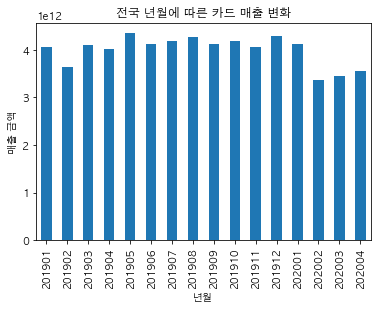

In [9]:
# 월별 이용금액 시각화

allDateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('매출 금액')
plt.title('전국 년월에 따른 카드 매출 변화')

plt.show()


In [10]:
# 전국 코로나 전후 카드 매출 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 매출 데이터 추출
allDateAMT2019 = allDateAMT.loc['201901': '201904']
allDateAMT2020 = allDateAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 카드매출 데이터 추출
allDateAMT2019_2 = allDateAMT.loc['201902': '201904']
allDateAMT2020_2 = allDateAMT.loc['202002': '202004']

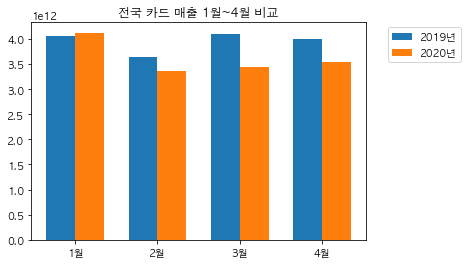

2019년 1월~4월과 2020년 1월~4월 전국 카드매출 t-statistics 값은 1.630 이며, p-value는 0.154 입니다.
2019년 2월~4월과 2020년 2월~4월 전국 카드매출 t-statistics 값은 3.062 이며, p-value는 0.038 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 11.88%가 하락하였습니다.


In [11]:
# 2019년 1월~4월, 2020년 1월~4월 전국 카드 매출 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)
width = 0.35
p1 = ax.bar(ind, allDateAMT2019, width)

p2 = ax.bar(ind+width, allDateAMT2020, width)

ax.set_title('전국 카드 매출 1월~4월 비교')
ax.set_xticks(ind+width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019년', '2020년'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 카드매출 T-test
allDateAMTttest = stats.ttest_ind(allDateAMT2019.values, allDateAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 전국 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %allDateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 카드대출 T-test
allDateAMTttest_2 = stats.ttest_ind(allDateAMT2019_2.values, allDateAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 전국 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %allDateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(allDateAMT2019_2.values)
AMT2020sum = sum(allDateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

## 강원

In [12]:
# 강원 이용금액

DateAMT = allAreaDateAMT['강원']

# 타지역 이용금액

DifferentAMT = differentDateAMT['강원']

# 같은지역 이용금액

SameAMT = sameDateAMT['강원']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT

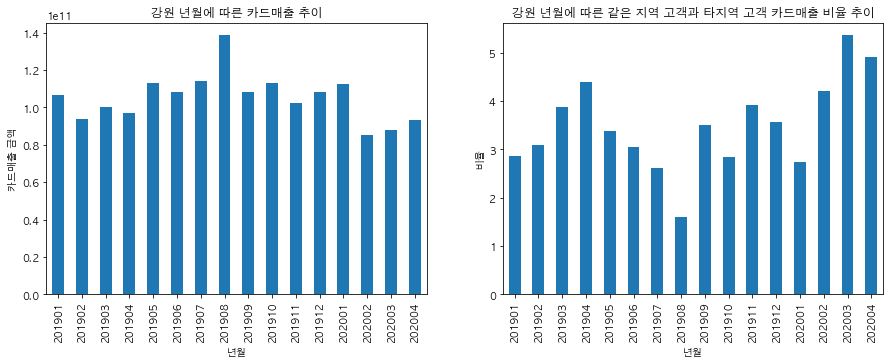

In [13]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('강원 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('강원 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()

In [14]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']

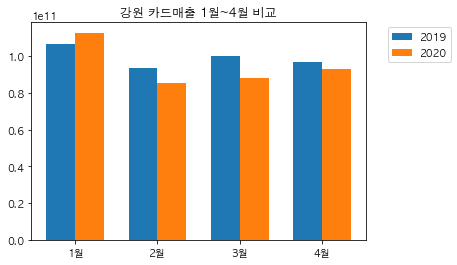

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.666 이며, p-value는 0.530 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.704 이며, p-value는 0.054 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 8.34%가 하락하였습니다.


In [15]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('강원 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

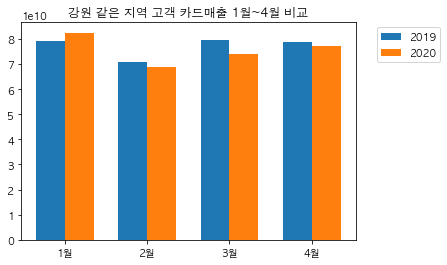

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.368 이며, p-value는 0.726 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.768 이며, p-value는 0.485 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 3.82%가 하락하였습니다.


In [16]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('강원 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

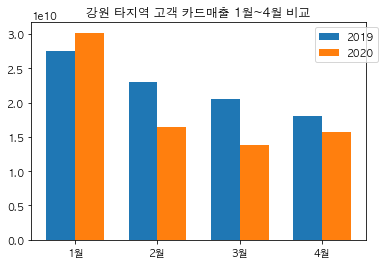

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 0.752 이며, p-value는 0.481 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 3.181 이며, p-value는 0.033 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 25.19%가 하락하였습니다.


In [17]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('강원 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

위와 같은 방법으로 17개 지역 분석을 하였습니다.